---

<div style="text-align: center; font-family: 'Arial', sans-serif; font-weight: bold; font-size: 30px;">
  OPERATION & SUPPLY CHAIN MANAGEMENT
    <br>FINAL PROJECT SPRING 2025<br>
  <div style="text-align: center; font-family: 'Arial', sans-serif; font-size: 30px;">
  </div>
</div>
<div style="text-align: center;">
  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRqGMX5trjtrOb87lNPBnkWhdyhB4JkJXk7Xw&s" alt="Waze Logo" width="250"/>
</div>
<div style="text-align: center; font-family: 'Arial', sans-serif; font-size: 25px; font-weight: bold">
    DECISION SUPORT SYSTEM <br>
    FINDING THE BEST LOCATION TO SET UP A WAREHOUSE<br>
</div>

---


#### **Task:**
Select the best location to set up a warehouse for real business case and create a table of distances between locations and provide conclusions

**Actions**

1. Select real business case (retail/wholesale/automotive/pharmacy/gas stations chain) and find coordinates for outlets’ locations,
2. Find the best place to set up a warehouse,
3. Identify distances between business case outlets and warehouse location,
4. Provide conclusions.

In [2]:
import pandas as pd

In [3]:
# Load the Excel file

df = pd.read_excel(r'Selver.xlsx', sheet_name='All')


In [4]:
df.shape

(72, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Store Name  72 non-null     object 
 1   Address     72 non-null     object 
 2   Latitude    72 non-null     float64
 3   Longitude   72 non-null     float64
dtypes: float64(2), object(2)
memory usage: 2.4+ KB


In [6]:
df.describe()

,Latitude,Longitude
count,72.000000,72.000000
mean,59.000181,25.281771
std,0.523934,1.140859
min,57.777500,22.486100
25%,58.384600,24.665475
50%,59.357350,24.776050
75%,59.436225,26.364975
max,59.509200,28.179700


In [7]:
df.head()

,Store Name,Address,Latitude,Longitude
0,Arsenali Selver,"Erika tn 14, Tallinn, 10416",59.4410,24.7280
1,Balti jaama Selver ABC,"Toompuiestee 37, Tallinn, 10149",59.4385,24.7360
2,Balti jaama turu Selver,"Kopli 1, Tallinn, 10412",59.4380,24.7365
3,Järve Selver,"Pärnu maantee 238, Tallinn, 11624",59.3933,24.7202
4,Kadaka Selver,"Kadaka tee 56a, Tallinn, 12915",59.4124,24.6673


References

https://medium.com/@twalkb29/python-warehouse-optimization-unsupervised-ml-project-d92a9bc69c52

https://medium.com/@genedarocha/133-optimizing-warehouse-operations-using-python-and-ai-3fe36412bfd2

In [8]:
df.columns

Index(['Store Name', 'Address', 'Latitude', 'Longitude'], dtype='object')

### **Python Code to Find the Geographic Midpoint (Warehouse Location)**

In [9]:
# Convert to list of (latitude, longitude) tuples
coords = list(zip(df['Latitude'], df['Longitude']))

print(coords)

[(59.441, 24.728), (59.4385, 24.736), (59.438, 24.7365), (59.3933, 24.7202), (59.4124, 24.6673), (59.4374, 24.754), (59.4282, 24.627), (59.4415, 24.712), (59.428, 24.728), (59.4369, 24.7451), (59.448, 24.88), (59.353, 24.6283), (59.4362, 24.7471), (59.4529, 24.8747), (59.4224, 24.6972), (59.438, 24.698), (59.45, 24.88), (59.394, 24.685), (59.4385, 24.713), (59.47, 24.83), (59.45, 24.89), (59.437, 24.728), (59.43, 24.66), (59.421, 24.799), (59.4215, 24.799), (59.4145, 24.7421), (59.4281, 24.7482), (59.45, 24.88), (59.4363, 24.7387), (58.3636, 26.7137), (58.3824, 26.7115), (58.3843, 26.7258), (58.3819, 26.7094), (58.3742, 26.7051), (58.3869, 26.7336), (58.3686, 26.7046), (58.3905, 26.6844), (58.3697, 26.7207), (58.3745, 26.7128), (59.3796, 28.179), (58.3639, 25.5944), (58.8725, 22.5833), (58.7489, 26.3931), (59.3586, 27.4123), (57.8489, 26.9931), (59.3033, 24.4139), (59.3986, 27.2731), (59.3511, 26.3556), (59.355, 24.889), (58.3833, 24.5139), (59.3947, 24.2342), (58.3742, 24.5131), (58.3

In [10]:
# calculate geometric point

def calculate_geometric_midpoint(coords):
    lat_sum = sum(coord[0] for coord in coords)
    lon_sum = sum(coord[1] for coord in coords)
    num_points = len(coords)
    return (lat_sum / num_points, lon_sum / num_points)

midpoint = calculate_geometric_midpoint(coords)
print("Geometric Midpoint:", midpoint)

Geometric Midpoint: (59.00018055555555, 25.281770833333333)


### **Python Code to Find the Warehouse Location**

In [11]:
import math

# midpoint
mid_lat = 59.00018055555555
mid_lon = 25.281770833333333

# Define spherical law of cosines function
def spherical_distance(lat1, lon1, lat2, lon2):
    lat1_rad = math.radians(90 - lat1)
    lat2_rad = math.radians(90 - lat2)
    lon_diff_rad = math.radians(lon2 - lon1)

    cos_d = (math.cos(lat1_rad) * math.cos(lat2_rad) +
             math.sin(lat1_rad) * math.sin(lat2_rad) * math.cos(lon_diff_rad))
    d = math.acos(cos_d) * 6371  # Radius of Earth in km
    return d


# Apply distance function for each store in KM (Kilometers)
df['Distance_to_Warehouse'] = df.apply(
    lambda row: spherical_distance(mid_lat, mid_lon, row['Latitude'], row['Longitude']),
    axis=1
)

# Round to 2 decimal places for neatness
df['Distance_to_Warehouse'] = df['Distance_to_Warehouse'].round(2)

df.head()


,Store Name,Address,Latitude,Longitude,Distance_to_Warehouse
0,Arsenali Selver,"Erika tn 14, Tallinn, 10416",59.4410,24.7280,58.27
1,Balti jaama Selver ABC,"Toompuiestee 37, Tallinn, 10149",59.4385,24.7360,57.79
2,Balti jaama turu Selver,"Kopli 1, Tallinn, 10412",59.4380,24.7365,57.73
3,Järve Selver,"Pärnu maantee 238, Tallinn, 11624",59.3933,24.7202,54.16
4,Kadaka Selver,"Kadaka tee 56a, Tallinn, 12915",59.4124,24.6673,57.66


In [13]:
# Export data to excel and save it

df.to_excel(r'selver_distances_to_warehouse.xlsx',index=False)

### **Calculate Total and Average Distance**

In [14]:
# Calculate Total and Average Distance

total_distance = df['Distance_to_Warehouse'].sum()
average_distance = df['Distance_to_Warehouse'].mean()

print(f"Total distance from all stores to warehouse: {total_distance:.2f} km")
print(f"Average distance to warehouse: {average_distance:.2f} km")


Total distance from all stores to warehouse: 5738.09 km
Average distance to warehouse: 79.70 km


### **Find Closest and Farthest Stores**

In [15]:
closest_store = df.loc[df['Distance_to_Warehouse'].idxmin()]
farthest_store = df.loc[df['Distance_to_Warehouse'].idxmax()]

print(f"Closest store: {closest_store['Store Name']} - {closest_store['Distance_to_Warehouse']:.2f} km")
print(f"Farthest store: {farthest_store['Store Name']} - {farthest_store['Distance_to_Warehouse']:.2f} km")


Closest store: Paide Selver - 20.46 km
Farthest store: Saare Selver - 181.94 km


Summary of distances (km):
count     72.000000
mean      79.695694
std       35.262604
min       20.460000
25%       56.195000
50%       60.160000
75%      107.395000
max      181.940000
Name: Distance_to_Warehouse, dtype: float64


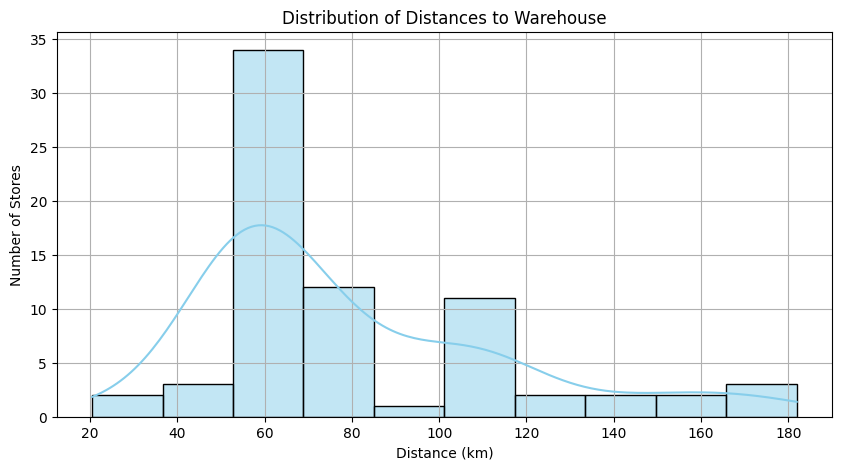

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Step 4.1: Summary statistics
print("Summary of distances (km):")
print(df['Distance_to_Warehouse'].describe())

# Step 4.2: Histogram of distances
plt.figure(figsize=(10, 5))
sns.histplot(df['Distance_to_Warehouse'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Distances to Warehouse')
plt.xlabel('Distance (km)')
plt.ylabel('Number of Stores')
plt.grid(True)
plt.show()

# Step 4.3: Map Visualization using Folium
# Create map centered on the warehouse
m = folium.Map(location=[mid_lat, mid_lon], zoom_start=11)

# Add warehouse marker
folium.Marker(
    location=[mid_lat, mid_lon],
    popup="Warehouse",
    icon=folium.Icon(color='red', icon='home')
).add_to(m)

# Add store markers
for _, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Store Name']} ({row['Distance_to_Warehouse']} km)",
        icon=folium.Icon(color='blue', icon='shopping-cart')
    ).add_to(m)

# Show the map
m.save("warehouse_store_map.html")
m


## **Justification for Warehouse Location (Geometric Midpoint)**

Our team selected the warehouse location based on the geometric midpoint of all **72 store locations**, calculated at **latitude 59.0002 and longitude 25.2818.**

Based on distance analysis:

**The average distance** from the warehouse to the stores is approximately **79.70 km.**

**The closest store is Paide Selver, located 20.46 km away.**

**The farthest store is Saare Selver, located 181.94 km away.**

These findings indicate that the chosen location is strategically positioned to serve all stores efficiently. The relatively moderate range between the nearest and farthest outlets supports the suitability of the geometric midpoint. It helps minimize total travel distances, potentially reducing both transportation costs and delivery times, making it a balanced and optimal location for the warehouse.